## Data Pre-processing

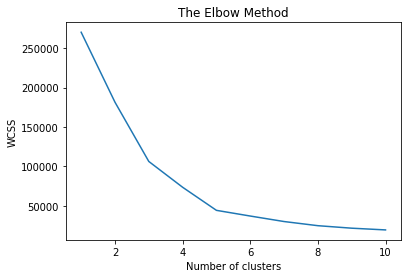

In [3]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing dataset
dataset = pd.read_csv('datasets/Mall_Customers.csv')

# # Separate dataset (X) and dependent vector (y)
X = dataset.filter(items=['Annual Income (k$)', 'Spending Score (1-100)'])

# Using the elbow method to find the optimal number of clusters

# y = dataset.filter(items=['Purchased'])
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Optimal number of clusters is 5

## K-Means Clustering

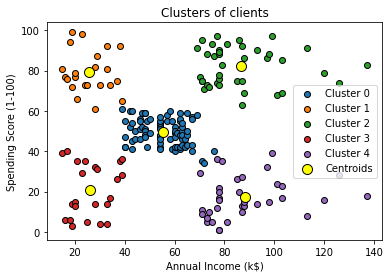

In [20]:
# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plot_set = pd.concat([X, pd.DataFrame(y_kmeans, columns=['y_kmeans'])], axis=1)
x1_column = 'Annual Income (k$)'
x2_column = 'Spending Score (1-100)'
y_column = 'y_kmeans'

for i in range(0, 5):
    subset = plot_set.loc[lambda df: df[y_column] == i, :]
    plt.scatter(subset.loc[:, x1_column], subset.loc[:, x2_column], label='Cluster ' + str(i), edgecolor='black', linewidth='1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids', edgecolor='black', linewidth='1')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
